In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: 

Use LU decomposition (with and without pivoting) for:
$$ 
A = \begin{pmatrix}
4 & 4 & 8 & 4 \\
4 & 5 & 3 & 7 \\
8 & 3 & 9 & 9 \\
4 & 7 & 9 & 5 
\end{pmatrix}
$$
$$
 b = \begin{pmatrix}
 1 \\
 2 \\
 3 \\
 4
 \end{pmatrix}
$$


In [ ]:
#LU Decomposiion without pivoting
A = np.array([4., 4, 8, 4, 4, 5, 3, 7, 8, 3, 9, 9, 4, 7, 9, 5]).reshape(4,4)
bs = np.array([1,2,3,4])

def ludec(A):
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    for j in range(n-1):
        for i in range(j+1,n):
            coeff = U[i,j]/U[j,j]
            U[i,j:]-= coeff*U[j,j:]
            L[i,j] = coeff
    return L, U
def forsub(L,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in range(n):
        xs[i] = (bs[i]- L[i,:i]@xs[:i])/L[i,i]
    return xs
def backsub(U,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        xs[i] = (bs[i]- U[i,i+1:]@xs[i+1:])/U[i,i]
    return xs
def lusolve(A,bs):
    L, U = ludec(A)
    ys = forsub(L,bs)
    xs = backsub(U,ys)
    return xs

lusolve(A,bs) #As seen in the error, divide by zero is encountered. This doesn't automatically mean the matrix is singular
#perhaps the rows can be swapped so that there won't be a zero pivot element

C:\Users\chyne\AppData\Local\Temp\ipykernel_11468\2232625096.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  xs[i] = (bs[i]- U[i,i+1:]@xs[i+1:])/U[i,i]
C:\Users\chyne\AppData\Local\Temp\ipykernel_11468\2232625096.py:25: RuntimeWarning: invalid value encountered in matmul
  xs[i] = (bs[i]- U[i,i+1:]@xs[i+1:])/U[i,i]


array([nan, nan, inf, inf])

In [ ]:
#LU Deecomposition  with pivoting
def LU_pivot(inA,inbs):
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size
    for j in range(n-1):
        k = np.argmax(np.abs(A[j:,j])) + j
        if k != j:
            A[j,:], A[k,:] = A[k,:], A[j,:].copy()
            bs[j], bs[k] = bs[k], bs[j]
        for i in range(j+1,n):
            coeff = A[i,j]/A[j,j]
            A[i,j:]-= coeff*A[j,j:]
            bs[i]-= coeff*bs[j]
    xs = backsub(A,bs)
    return xs

LU_pivot(A,bs) #The same error is encountered, and  we know that it is because the  matrix is singular

C:\Users\chyne\AppData\Local\Temp\ipykernel_11468\2232625096.py:25: RuntimeWarning: invalid value encountered in scalar divide
  xs[i] = (bs[i]- U[i,i+1:]@xs[i+1:])/U[i,i]


array([nan, nan, nan, nan])

As we can see from above, both results in an error. This is because the set of linear equations doesn't have a solution, in other words it's a singular matrix. However, the difference is that without pivoting, we're not sure if the error is actually because the matrix is singular, or if the algorithm fails because of the ordering of the equations. When we do use (partial) pivoting, we are sure that the error is indeed due to the matrix being singular. This is because pivoting doesn't blindly use $A_{jj}$, but instead takes the largest element in that column. So, when you get a zero on the diagonal with pivoting, you know that it can't be fixed by simply swapping a row. Thus, the determinant is zero, and the matrix is singular. 

Now, what if we replace the element in $U_{ii}$ that is zero into just a value that is really small, say $10^{-20}$? This still wouldn't work because of rounding errors. Think, you have a really small number, and you use it as the pivot element. This means you would divide by that really small number, and thus get something really big. So now in your matrix, you have very large differences in the elements, and when you do forward or backward substitution, you will get bad rounding errors (i.e. big number $ + 1 \approx$ big number). 

# Problem 2 

For the total error in the forward difference vs. the that of the central difference method, let h take values $10^-1$, $10^-2$, $10^-3$, $10^-4$, and plot the total error for the two cases. Assume $f(x) = 1$, $f''(x) = 0.1$, and $f'''(x) = 100$  

In [11]:
hs = np.logspace(-1, -4, 4)
f, fpp, fppp = 1, 0.1, 100

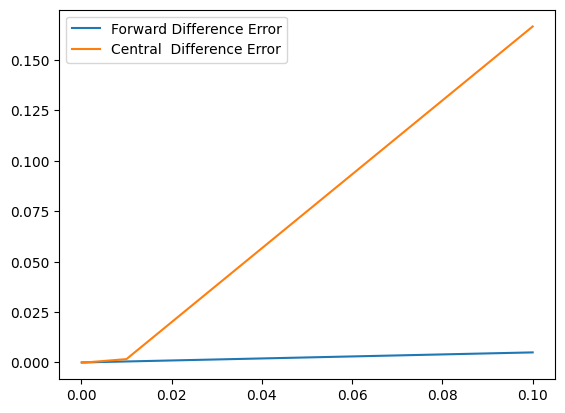

In [20]:
# Forward Difference
def error_fd(fpp, f, h, e_m = 2.2e-16): 
    error = (h/2)*abs(fpp) + (2*abs(f)*e_m)/h
    return error

# Central Difference
def error_cd(fppp, f, h, e_m = 2.2e-16):
    error = (h**2 / 6)*abs(fppp) + (abs(f*e_m))/h
    return error

e_fds = []
e_cds = []
for h in hs: 
    e_fds.append(error_fd(fpp, f, h, e_m = 2.2e-16))
    e_cds.append(error_cd(fppp, f, h, e_m = 2.2e-16))

plt.plot(hs, e_fds, label = 'Forward Difference Error')
plt.plot(hs, e_cds, label = 'Central  Difference Error')
plt.legend()
plt.show()

From the plot we can see that the error when using the forward difference method stays relatively low, compared to that of the central difference  method. We can even print out the values for each h so we can see investigate more on what is happening.

In [21]:
print(e_fds)
print(e_cds)

[0.005000000000004401, 0.000500000000044, 5.000000044e-05, 5.0000044e-06]
[0.16666666666666888, 0.0016666666666886668, 1.6666666886666664e-05, 1.666688666666667e-07]


Here we see that the error in the central difference method jumps by $\approx 10^{-2}$ for every h, while  the error in the forward difference method jumps $\approx 10^{-1}$ for every h. Taking a closer look at the equations for the error in each method, we see that this  behavior  results from the value of $f''(x)$ and $f'''(x)$. The value of $f''(x)$ is small compared to that of $f'''(x)$. Since the second term is almost the same for both error equations, then these second and third derivatives really determine how much the error grows. Because $f'''(x)$ is much bigger, the error in  the central difference is also much bigger compared to  that  of the forward difference. 

One possible form of this function is  $f(x) = Ax^3 + Bx^2 + C$, where A, B, and C are constants, and A is big compared to B. With this form of a function, we will have:
$$ f''(x) = (3)(2)(A)x + 2(B) $$
$$ f'''(x) = (3)(2)(A) $$
So if you pick a small x, $f''(x)$ will be really small, $f'''(x)$ on the other hand wouldn't depend on x anymore, and since A is a large value then it follows that $f'''(x)$ would also be large. B also has to be small, since at $f''(x)$, B is not multiplied to x.   

# Problem 3

Plot $f(x) = x^6 + 0.1 \log(|1 + 3 (1-x)|)$ 
Use 100 poins from x   = 0.5 o 1.5 to plot this funcion in matplotlib. 

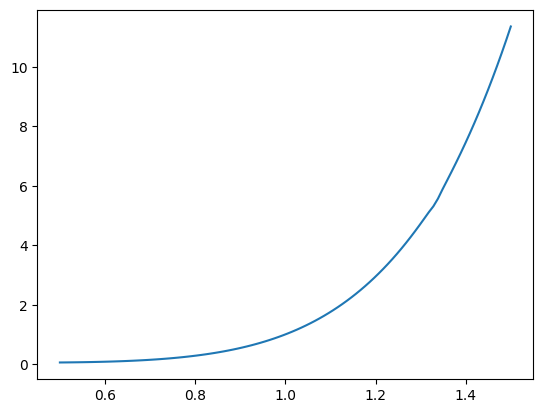

In [ ]:
import math as mt
# using 100 points
xs = np.linspace(0.5, 1.5, 100)
def f(x):
    y =  x**6  +0.1*mt.log10(abs(1 + 3*(1-x)))
    return y

ys = []
for x in xs: 
    ys.append(f(x)) 
plt.plot(xs,ys)

In [29]:
print(xs)

[0.5      0.500001 0.500002 ... 1.499998 1.499999 1.5     ]


Above is the plot of f(x) using only 100 grid points. There is no visible dip, however we should be observing one. This is because of the $\log{(|1+3(1-x)|)}$ factor on the function. Since $\log{(0)}$ is negative infinity, we should be expecting a dip for when $|1 + 3(1-x)| = 0$. Solving this equation, we get that the dip happens at $x = \frac{4}{3} $. Now we know, numerically that this is a repeating decimal $1.\overline{33}$, but repeating decimals don't really have a floating point representation. Thus, we need grid  points that get really close to this value so we can see the dip. For 100 points from x = 0.5 to x =  1.5, the grid isn't fine enough for the dip to actually be seen. 

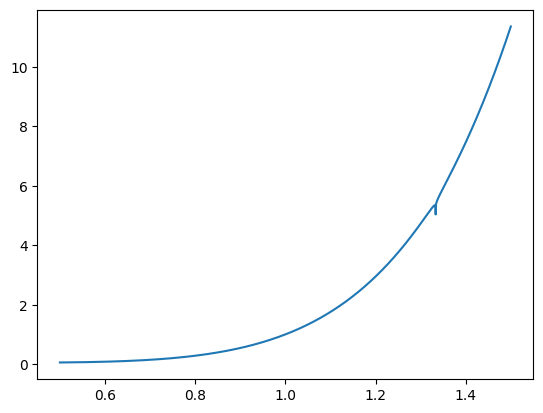

In [33]:
# using  a much finer grid
xs_new = np.linspace(0.5, 1.5, 1000000)
ys = []
for x in xs_new: 
    ys.append(f(x)) 
plt.plot(xs,ys)

Now we are able to see the dip because we have a finer grid, which means there are points that are near enough to $x = 1.\overline{33}$. In conclusion, for plotting functions that have discontinuities at a point, or oscillates rapidly, a much finer grid ensures that you capture the analtically expected behavior. 